# Initial Analysis for The Ideal Partner Dataset

This dataset was collected for the purpose of my PSYC 253, Judgement and Decisions, class. It is allowed to be distributed and analyzed. 203 responses were collected from respondents from different demographics.

Survey respondents were asked to:

<blockquote>
"Imagine that this is 2434 and (for a price) you could design your ideal man/woman. You would begin by reviewing a list of traits  (like the ones enumerated below), then decide which traits  matter to you  a lot and which  traits matter far less or not at all. 
Suppose further that you have only a finite mate design budget of $500, all of which  has  to be allocated among various mate-defining  traits in a manner that accurately reflects your desires and preferences at this point in time. 
Keeping all this in mind, please indicate how much you would be prepared to spend on each of the 10 traits listed below:<br/>

$____Body

$____Face

$____Fidelity 

$____Intelligence

$____Kindness

$____Sense of humor

$____Sensitivity

$____Sexual skill

$____Shared values

$ ____Wealth
</blockquote>

In [1]:
import pandas as pd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/Judy_PSYC_dataset.csv')

## Dataframe examination

`this_is_fixed_width.csv` - this file contains ...

In [3]:
data.shape

(203, 25)

The dataset has 203 rows and 25 columns.

In [4]:
data.sample(5)

,Body,Face,Fidelity,Intelligence,Kindness,Senseofhumor,Sensitivity,Sexualskill,Sharedvalues,Wealth,...,Sex_Female_0_Male1,Age,Relationship_Yes1_No0,CRT1,CRT2,CRT3,CRT4,CRT5,CRT6,crttotal
4,70,70,100,90,80,50,0,15,25,0,...,1,21,0,1,1,1,1,1,1.0,6.0
60,75,80,80,70,30,60,10,50,20,25,...,1,22,1,1,1,1,1,1,1.0,6.0
136,10,30,60,70,65,40,75,20,100,30,...,0,22,1,1,1,1,1,1,1.0,6.0
23,50,50,70,60,65,70,40,40,55,0,...,0,21,0,1,1,1,1,1,1.0,6.0
52,90,50,70,50,40,30,30,50,50,40,...,1,22,0,1,0,1,1,0,0.0,3.0


Each row represents how much the respondent values attributes such as, body, face, fidelity, etc. The rows also contain demographic information such as sex and age.

In [5]:
data.columns

Index(['Body', 'Face', 'Fidelity', 'Intelligence', 'Kindness', 'Senseofhumor',
       'Sensitivity', 'Sexualskill', 'Sharedvalues', 'Wealth', 'sum',
       'physicalattractiveness', 'socialattractiveness', 'sexpartners',
       'politicalorientation_1extremelyliberal_7extremelyconservative',
       'Sex_Female_0_Male1', 'Age', 'Relationship_Yes1_No0', 'CRT1', 'CRT2',
       'CRT3', 'CRT4', 'CRT5', 'CRT6', 'crttotal'],
      dtype='object')

The columns represent the attributes listed out in the survey conducted, demographic information, political orientation, whether the respondent is currently in a relationship, as well as how much the respondents scored on 6 questions on the Cognitive Reflection Test to evaluate if the respondents use system 1 or system 2 thinking more when answering questions.

All of the variables are assigned importances in the form of $ amount values from 0 to 500. 0 being unimportant and 500 being extremely important.
* Body - importance of body attractiveness in selecting partner (scale 0-500)
* Face - importance of face attractiveness in selecting partner (scale 0-500)
* Fidelity - importance of loyalty in selecting partner (scale 0-500)
* Intelligence - importance of intelligence in selecting partner (scale 0-500)
* Kindness - importance of kindness in selecting partner (scale 0-500)
* Sense of humor - importance of sense of humor in selecting partner (scale 0-500)
* Sensitivity - importance of sensitivity in selecting partner (scale 0-500)
* Sexualskill - importance of sexual skill in selecting partner (scale 0-500)
* Sharedvalues - importance of shared values in selecting partner (scale 0-500)
* Wealth - importance of wealth in selecting partner (scale 0-500)

## Data Cleaning

This dataset was the survey results of a study conducted by a Penn professor, so it does not require extensive cleaning. However, I did notice that for one of the survey questions, which is "How many sex partners would you ideally like to have over a lifetime?" one of the resonses was "1000,' which is a statistical outlier for the rest of the responses. For the purpose of calculation the spread of responses to this question, I am removing this 1000 outlier. Also, because 1000 does not make too much sense realistically.

In [38]:
data.iloc[:,:10].sum(axis=1).unique()

array([500])

In [6]:
data_filter = data["sexpartners"] == 1000

In [7]:
data_clean = data[-data_filter]

In [8]:
data_clean.shape

(202, 25)

## Data Exploration

<AxesSubplot:>

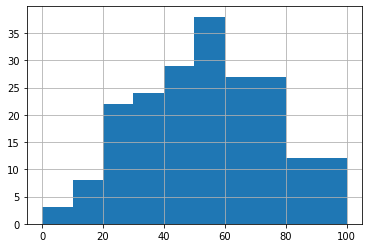

In [9]:
data_clean["Body"].hist()

In [10]:
data_clean["Body"].describe()

count    202.000000
mean      49.950495
std       22.195368
min        0.000000
25%       30.000000
50%       50.000000
75%       68.750000
max      100.000000
Name: Body, dtype: float64

There is a relatively normal distribution over people's placed importance on their partner's body. This demonstrates that the respondents to this survey have a diversified view on their placed importance of their partner's body attractiveness.

<AxesSubplot:>

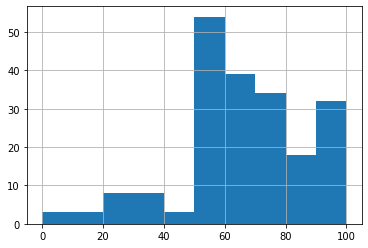

In [11]:
data_clean["Fidelity"].hist()

The distribution of people's placed importance on their partner's fidelty skews to the right, meaning that the majority of people care a lot of fidelity (>$50).

In [12]:
data_clean["Fidelity"].describe()

count    202.000000
mean      62.490099
std       21.960217
min        0.000000
25%       50.000000
50%       60.000000
75%       75.000000
max      100.000000
Name: Fidelity, dtype: float64

<AxesSubplot:>

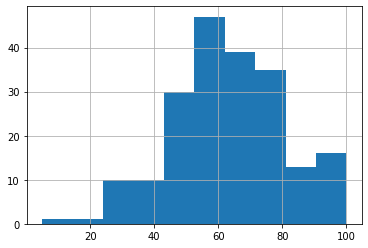

In [13]:
data_clean["Intelligence"].hist()

<AxesSubplot:>

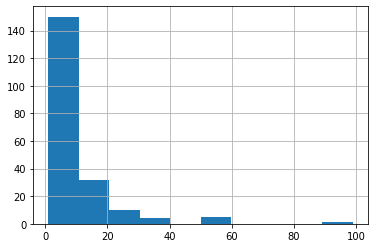

In [14]:
data_clean["sexpartners"].hist()

<AxesSubplot:>

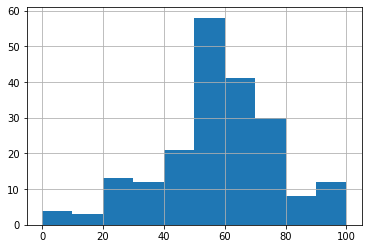

In [15]:
data_clean["Senseofhumor"].hist()

<AxesSubplot:>

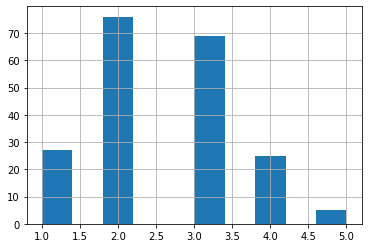

In [16]:
data_clean["politicalorientation_1extremelyliberal_7extremelyconservative"].hist()

This dataset leans liberal on the political orientation spectrum.

In [17]:
data_clean.rename(columns={'Sex_Female_0_Male1': 'Sex'}, inplace=True)

<AxesSubplot:>

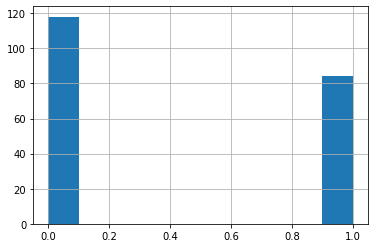

In [18]:
data_clean["Sex"].hist()

There is more females in the study than males.

In [19]:
data_clean['Sex']=data_clean['Sex'].map({0: 'female',
                                      1: 'male'})

<AxesSubplot:>

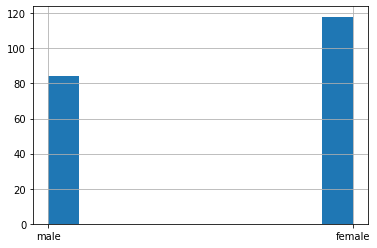

In [20]:
data_clean["Sex"].hist()

In [21]:
data_clean.rename(columns={'Relationship_Yes1_No0': 'Relationship'}, inplace=True)

In [22]:
data_clean['Relationship']=data_clean['Relationship'].map({0: 'Not in a relationship',
                                      1: 'In a relationship'})

<AxesSubplot:>

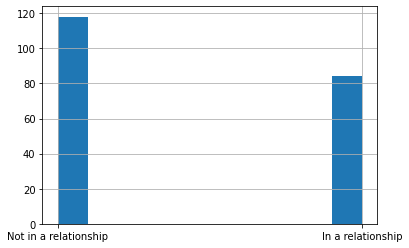

In [23]:
data_clean["Relationship"].hist()

There is more people not in relationships in the study than ones who are in the relationship.

In [24]:
data_clean["Age"].mean()

21.787128712871286

In [25]:
data_clean["Age"].max()

51

In [26]:
data_clean["Age"].min()

17

<AxesSubplot:>

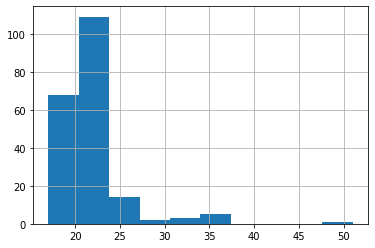

In [27]:
# note data is skewed - what do you think re. matching these data to 
# those in PEW by age range
# any relationships using age as a continuous value are likely to be problematic
data_clean["Age"].hist()

The respondents to the survey have a mean age of 21 years old. The youngest is 17 years old and the oldest is 51 years old.

### Drop age above 30

In [28]:
age_above_30 = data_clean['Age']>30
data_clean = data_clean[-age_above_30]

In [29]:
data.shape

(203, 25)

In [30]:
data_clean.shape

(193, 25)

### Save cleaned data to a csv file

In [31]:
data_clean.to_csv('../data/Judy_PSYC_dataset_clean.csv', index=False)